<a href="https://colab.research.google.com/github/farrelrassya/Machine-Learning-with-Imbalanced-Dataset-Udemy/blob/main/8_Precision-Recall-Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score,
    auc,
)

from yellowbrick.classifier import PrecisionRecallCurve

In [4]:
# load data
data = pd.read_csv('kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.00,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.00,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.00,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.00,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.00,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145746,98.61,20.66,2.07,37.0,-70.5,1015.7,0.67,-0.46,9.0,-76.5,...,416.9,1.73,2.49,9.0,-87.0,464.7,0.63,0.45,0.69,0
145747,73.15,24.85,0.61,32.5,-40.5,650.2,1.58,-0.05,2.5,-89.5,...,1354.3,0.05,-1.14,-4.0,-43.0,304.1,-0.02,0.10,-0.66,0
145748,100.00,71.76,41.92,954.5,-1039.0,-562.3,5.19,59.89,917.0,-1044.0,...,-236.2,3.56,11.87,47.0,-175.0,-245.3,3.41,0.44,0.78,1
145749,85.65,26.46,1.85,42.0,26.0,2738.3,-0.85,0.55,8.0,-84.0,...,1919.2,-0.34,-0.98,-16.0,-89.0,12.0,2.88,0.54,0.77,0


In [5]:
# imbalanced target

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [6]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [8]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


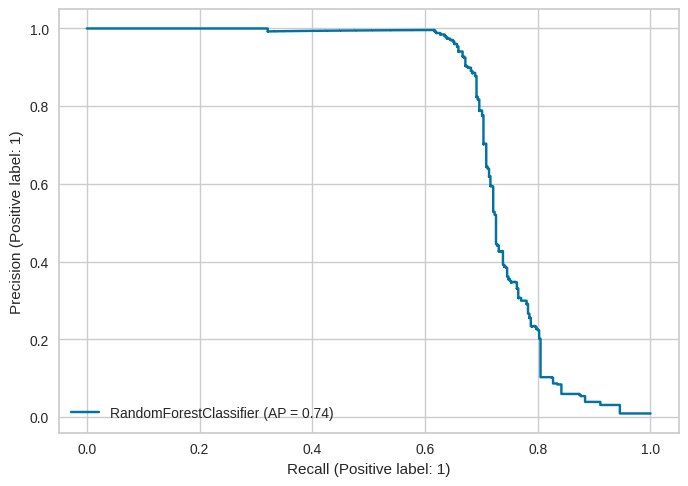

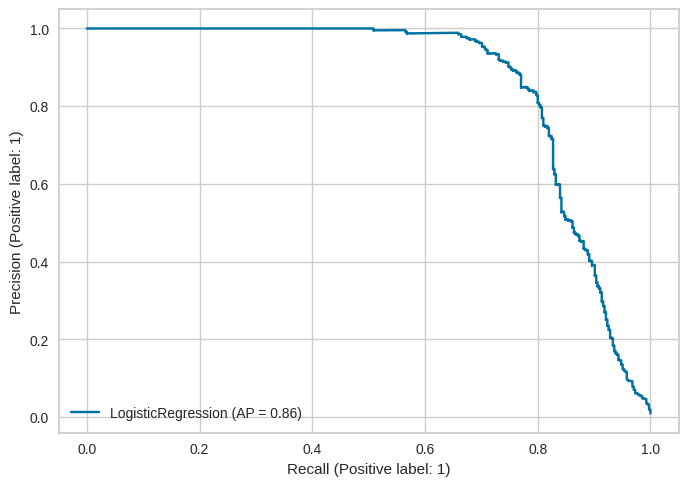

In [9]:
rf_disp = PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
logit_disp = PrecisionRecallDisplay.from_estimator(logit, X_test, y_test)

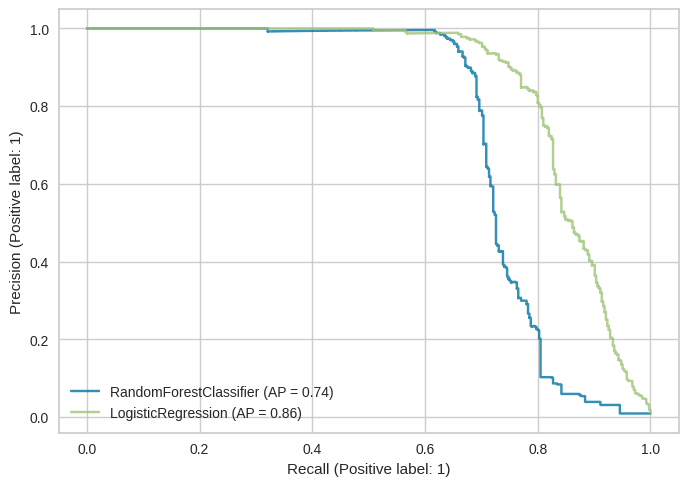

In [10]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

The **Area Under the Precision-Recall** (PR) Curve is another metric used to evaluate the performance of a classification model, especially in situations where the class distribution is imbalanced.

The Logistic Regression model has a higher PR-AUC score (0.86) compared to the Random Forest model (0.75), indicating better precision-recall balance for the Logistic Regression model.

1. High Precision: The model is good at minimizing false positives. In other words, when it predicts a positive outcome, it is likely to be correct.

2. High Recall (Sensitivity): The model is good at capturing most of the actual positive instances. It's able to identify a large portion of the true positive cases in the dataset.

In [11]:
# random forests

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_rf)

# then using these values, determine the area under the curve
auc_logit = auc(recall, precision)
print('Area under PR Curve Random Forests: ', auc_logit)

# logistic regression

# first find preciion and recall various at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_logit)

# then using these values, determine the area under the curve
auc_logit = auc(recall, precision)
print('Area under PR Curve Logistic Regression: ', auc_logit)

Area under PR Curve Random Forests:  0.7455492886184477
Area under PR Curve Logistic Regression:  0.8594122801589587


In [12]:
# random forests
ap_rf = average_precision_score(y_test, y_test_rf)
print('Average Precision Random Forests: ', ap_rf)

# logistic regression
ap_logit = average_precision_score(y_test, y_test_logit)
print('Average Precision Logistic Regression: ', ap_logit)


Average Precision Random Forests:  0.7435373757327486
Average Precision Logistic Regression:  0.8594858653965165


The Logistic Regression model has a higher Average Precision score (0.86) compared to the Random Forest model (0.74), suggesting better precision-recall trade-off for the Logistic Regression model.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


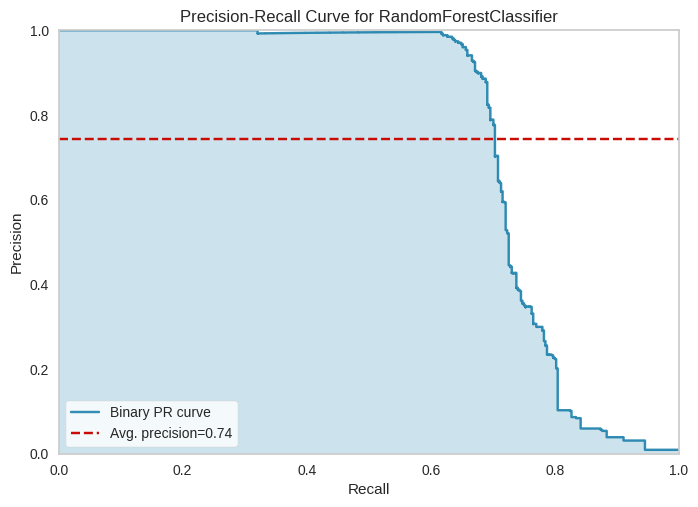

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [13]:
visualizer = PrecisionRecallCurve(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


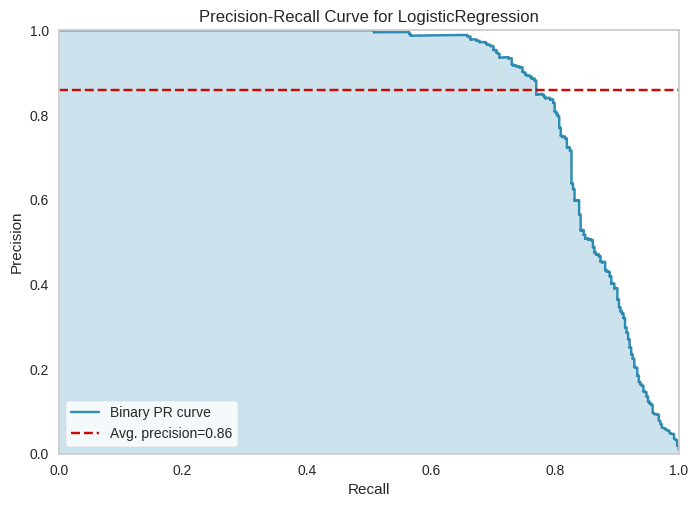

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [14]:
visualizer = PrecisionRecallCurve(logit, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure